<a href="https://colab.research.google.com/github/Sanusingh3107/Amazon-Product-Review-Sentiment-Analysis-using-RNN-LSTM/blob/main/Amazon_Product_Review_Sentiment_Analysis_using_RNN_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sklearn for train test split
from sklearn.model_selection import train_test_split

# TensorFlow and Keras for machine learning
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [ ]:
data = pd.read_csv('/content/Amazon-Product-Review-Sentiment-Analysis-using-RNN-Dataset.csv')

In [ ]:
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [ ]:
print(data.shape)

(25000, 2)


In [ ]:
print("Null Values:\n", data.isna().sum())

Null Values:
 Review       1
Sentiment    0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
print("Null Values after dropping:\n", data.isna().sum())

Null Values after dropping:
 Review       0
Sentiment    0
dtype: int64


In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,5000
2,5000
3,5000
4,5000
5,4999


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt')

# Review Text Cleaning
def clean_reviews(text):

    # removing brackets from the string using regex
    regex = re.compile('<.?>')
    text = re.sub(regex, ' ', text)

    # removing special characters
    pattern = re.compile('[^a-zA-Z0-9\s]')
    text = re.sub(pattern, '', text)

    # removing numbers
    pattern = re.compile('[\d+]')
    text = re.sub(pattern, '', text)

    # converting text to lower case
    text = text.lower()

    # Tokenization of words
    text = word_tokenize(text)

    # Removing stop words
    text = [word for word in text if word not in stop_words]

    return text

data['Review'] = data['Review'].apply(clean_reviews)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokenizer = Tokenizer()

# Convert all reviews to list
reviews_to_list = data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

# Generate text sequence
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

max_words = 500

# Padding sequences
padded_sequences = pad_sequences(text_sequences, maxlen=max_words)
text_sequences = np.array(padded_sequences)

# one hot encoding
data = pd.get_dummies(data, columns = ['Sentiment'])

# Generatin our X (input) to the model
# using pad_sequences and y (output)
x = pad_sequences(text_sequences, maxlen = max_words)
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4',
    'Sentiment_5']]
print(x.shape, y.shape)

(24999, 500) (24999, 5)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(19999, 500) (19999, 5)
(5000, 500) (5000, 5)


In [ ]:
rnn = Sequential(name="Simple_RNN")
rnn.add(Embedding(len(tokenizer.word_index)+1,
                  max_words,
                  input_length=max_words))
rnn.add(SimpleRNN(128, activation = "relu", return_sequences=True))
rnn.add(SimpleRNN(64, activation = "relu", return_sequences=False))
rnn.add(Dense(5, activation = "softmax"))

print(rnn.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 500)          17276000  
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 128)          80512     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 17369189 (66.26 MB)
Trainable params: 17369189 (66.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Compiling model
rnn.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the model
history = rnn.fit(x_train, y_train,
                        batch_size=64,
                        epochs=10,
                        verbose=1,
                          validation_data = (x_test, y_test))

# Printing model score on test data
print("Simple_RNN Score---> ", rnn.evaluate(x_test, y_test, verbose=1))


Epoch 1/10
313/313 [==============================] - 164s 517ms/step - loss: 1.4240 - accuracy: 0.3466 - val_loss: 1.2534 - val_accuracy: 0.4448
Epoch 2/10
313/313 [==============================] - 161s 514ms/step - loss: 1.0942 - accuracy: 0.5371 - val_loss: 1.2923 - val_accuracy: 0.4276
Epoch 3/10
313/313 [==============================] - 161s 513ms/step - loss: 0.8000 - accuracy: 0.6849 - val_loss: 1.4701 - val_accuracy: 0.4214
Epoch 4/10
313/313 [==============================] - 159s 510ms/step - loss: 0.5208 - accuracy: 0.8071 - val_loss: 1.7757 - val_accuracy: 0.3992
Epoch 5/10
313/313 [==============================] - 158s 503ms/step - loss: 0.3213 - accuracy: 0.8843 - val_loss: 2.1679 - val_accuracy: 0.4288
Epoch 6/10
313/313 [==============================] - 157s 503ms/step - loss: 0.2040 - accuracy: 0.9286 - val_loss: 2.4366 - val_accuracy: 0.3978
Epoch 7/10
313/313 [==============================] - 158s 504ms/step - loss: 0.1718 - accuracy: 0.9405 - val_loss: 2.9341 -

In [ ]:
model = Sequential(name="LSTM_Model")
model.add(Embedding(len(tokenizer.word_index)+1,
                    max_words,
                    input_length=max_words))

# adding a LSTM layer
model.add(LSTM(150, return_sequences=False))
BatchNormalization()
model.add(Dropout(0.5))

#adding a dense layer with activation function of relu
model.add(Dense(50, activation='relu'))
BatchNormalization()
model.add(Dropout(0.5))

# adding the final output activation with activation function of softmax
model.add(Dense(5, activation='softmax'))

# printing model summary
print(model.summary())

Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 500)          17276000  
                                                                 
 lstm_6 (LSTM)               (None, 150)               390600    
                                                                 
 dropout_7 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 255       
                                                                 
Total params: 17674405 (67.42 MB)
Trainable params: 1767

In [ ]:
# Compiling the model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

# Training the GRU model
history = model.fit(x_train, y_train,
                         batch_size=64,
                         epochs=10,
                         verbose=1,
                       validation_data=(x_test, y_test))

# Printing model score on test data
print("LSTM model Score---> ", model.evaluate(x_test, y_test, verbose=1))


Epoch 1/10
313/313 [==============================] - 315s 1000ms/step - loss: 1.3744 - accuracy: 0.3767 - val_loss: 1.2292 - val_accuracy: 0.4668
Epoch 2/10
313/313 [==============================] - 312s 999ms/step - loss: 1.1032 - accuracy: 0.5282 - val_loss: 1.2228 - val_accuracy: 0.4752
Epoch 3/10
313/313 [==============================] - 313s 999ms/step - loss: 0.9195 - accuracy: 0.6194 - val_loss: 1.3740 - val_accuracy: 0.4458
Epoch 4/10
313/313 [==============================] - 313s 1s/step - loss: 0.7452 - accuracy: 0.7124 - val_loss: 1.5910 - val_accuracy: 0.4444
Epoch 5/10
313/313 [==============================] - 313s 1s/step - loss: 0.6016 - accuracy: 0.7790 - val_loss: 1.7530 - val_accuracy: 0.4368
Epoch 6/10
313/313 [==============================] - 313s 1s/step - loss: 0.4956 - accuracy: 0.8216 - val_loss: 2.0506 - val_accuracy: 0.4328
Epoch 7/10
313/313 [==============================] - 314s 1s/step - loss: 0.4319 - accuracy: 0.8442 - val_loss: 2.1474 - val_accura

Text(0, 0.5, 'Accuracy')

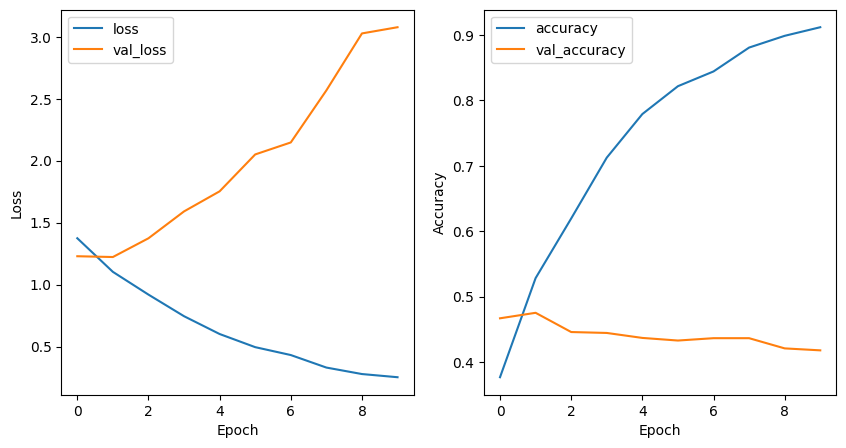

In [ ]:
# Plotting the history
metrics = history.history
plt.figure(figsize=(10, 5))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'],
         metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


157/157 [==============================] - 25s 159ms/step


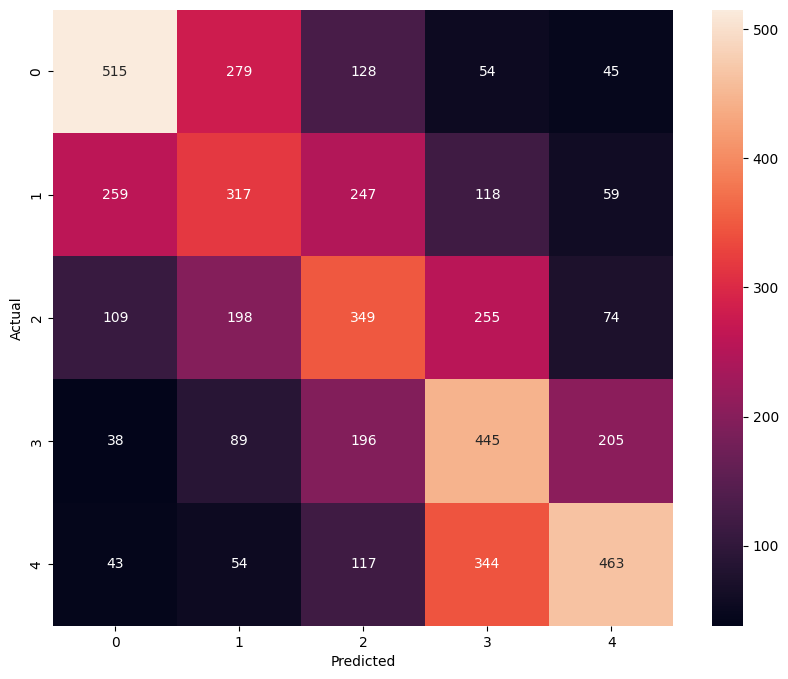

In [ ]:
# converting y_test tht was one hot encoded to one column fo rconfusion matrix
y_true = np.argmax(y_test.values, axis=1)
y_true.shape

# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = tf.math.confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.50      0.52      1021
           1       0.34      0.32      0.33      1000
           2       0.34      0.35      0.35       985
           3       0.37      0.46      0.41       973
           4       0.55      0.45      0.50      1021

    accuracy                           0.42      5000
   macro avg       0.42      0.42      0.42      5000
weighted avg       0.43      0.42      0.42      5000



In [ ]:
def predict_review_rating(text):
  text_sequences_test = np.array(tokenizer.texts_to_sequences([text]))
  testing = pad_sequences(text_sequences_test, maxlen = max_words)
  y_pred_test = np.argmax(model.predict(testing), axis=1)
  return y_pred_test[0]+1

# Testing
rating1 = predict_review_rating('Worst product')
print("The rating according to the review(Worst) is: ", rating1)

rating2 = predict_review_rating('Awesome product,  I will recommend this to other users.')
print("The rating according to the review(Best) is: ", rating2)


1/1 [==============================] - 0s 73ms/step
The rating according to the review(Worst) is:  1
1/1 [==============================] - 0s 76ms/step
The rating according to the review(Best) is:  4
